Import Libraries

In [1]:
import numpy as np
import pandas as pd

Loading the Data

Import Data

In [2]:
loan_data_inputs_train = pd.read_csv("loan_data_inputs_train.csv", index_col = 0)
loan_data_targets_train = pd.read_csv("loan_data_targets_train.csv", index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv("loan_data_inputs_test.csv", index_col = 0)
loan_data_targets_test = pd.read_csv("loan_data_targets_test.csv", index_col = 0, header = None)

In [3]:
loan_data_backup = pd.read_csv("loan_data_2015.csv")

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/2455948348.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("loan_data_2015.csv")


Explore Data

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

General Preprocessing

Preprocessing few continuous variables

Turn strings into integers

In [7]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [8]:
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("n/a", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" year", "")
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’ replaced with nothing. 
# Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/2336024767.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years", "")


In [9]:
type(loan_data["emp_length_int"][0])

str

In [10]:
loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"])

In [11]:
type(loan_data["emp_length_int"][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [12]:
loan_data["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [13]:
loan_data["term_int"] = loan_data["term"].str.replace(" months", "")

In [14]:
loan_data["term_int"] =pd.to_numeric(loan_data["term_int"])

In [15]:
type(loan_data["term_int"][0])

numpy.int64

Date format

In [16]:
loan_data["earliest_cr_line"]

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [17]:
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"],format = "%b-%y")

In [18]:
type(loan_data["earliest_cr_line_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
pd.to_datetime("2017-12-01") - loan_data["earliest_cr_line_date"]

0        10165 days
1         5997 days
2         2345 days
3         6940 days
4         6331 days
            ...    
421089    4839 days
421090   15981 days
421091    5205 days
421092    5175 days
421093    5844 days
Name: earliest_cr_line_date, Length: 421094, dtype: timedelta64[ns]

In [20]:
loan_data["mths_since_earliest_cr_line"] = round(pd.to_numeric((pd.to_datetime("2017-12-01") - loan_data["earliest_cr_line_date"]) / np.timedelta64(1, "M")))
# Assume we are now in December 2017
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [21]:
loan_data["mths_since_earliest_cr_line"].describe()

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
loan_data.loc[: ,["earliest_cr_line", "earliest_cr_line_date", "mths_since_earliest_cr_line"]][loan_data["mths_since_earliest_cr_line"] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
254,Jan-57,2057-01-01,-469.0
618,Aug-64,2064-08-01,-560.0
648,Jul-68,2068-07-01,-607.0
1808,Jan-65,2065-01-01,-565.0
2583,Sep-64,2064-09-01,-561.0
...,...,...,...
418890,Jun-68,2068-06-01,-606.0
420450,Jan-66,2066-01-01,-577.0
420642,Sep-68,2068-09-01,-609.0
420794,Sep-65,2065-09-01,-573.0


Note: 用maximum observed difference替代上述为负的values，因为这些日期也远远早于2017-12-01

In [23]:
loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"] < 0] = loan_data["mths_since_earliest_cr_line"].max()

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/4102275047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"] < 0] = loan_data["mths_since_earliest_cr_line"].max()


In [24]:
min(loan_data["mths_since_earliest_cr_line"])

61.0

In [25]:
loan_data["issue_d"]

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [26]:
loan_data["issue_date"] = pd.to_datetime(loan_data["issue_d"],format = "%b-%y")

In [27]:
type(loan_data["issue_d"][0])

str

In [28]:
pd.to_datetime("2017-12-01") - loan_data["issue_date"]

0         731 days
1         731 days
2         731 days
3         731 days
4         731 days
            ...   
421089   1065 days
421090   1065 days
421091   1065 days
421092   1065 days
421093   1065 days
Name: issue_date, Length: 421094, dtype: timedelta64[ns]

In [29]:
loan_data["mths_since_issue_date"] = round(pd.to_numeric((pd.to_datetime("2017-12-01") - loan_data["issue_date"]) / np.timedelta64(1, "M")))

In [30]:
loan_data["mths_since_issue_date"].describe()

count    421094.000000
mean         29.044629
std           3.458162
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          35.000000
Name: mths_since_issue_date, dtype: float64

Preprocessing few discrete variables

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           421094 non-null  int64         
 1   member_id                    421094 non-null  int64         
 2   loan_amnt                    421094 non-null  int64         
 3   funded_amnt                  421094 non-null  int64         
 4   funded_amnt_inv              421094 non-null  float64       
 5   term                         421094 non-null  object        
 6   int_rate                     421094 non-null  float64       
 7   installment                  421094 non-null  float64       
 8   grade                        421094 non-null  object        
 9   sub_grade                    421094 non-null  object        
 10  emp_title                    397220 non-null  object        
 11  emp_length                

In [32]:
pd.get_dummies(loan_data["grade"])

,A,B,C,D,E,F,G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [33]:
pd.get_dummies(loan_data["grade"], prefix = "grade", prefix_sep = ":")

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [34]:
loan_data_dummies = [pd.get_dummies(loan_data["grade"], prefix = "grade", prefix_sep = ":"),
                    pd.get_dummies(loan_data["sub_grade"], prefix = "sub_grade", prefix_sep = ":"),
                    pd.get_dummies(loan_data["home_ownership"], prefix = "home_ownership", prefix_sep = ":"),
                    pd.get_dummies(loan_data["verification_status"], prefix = "verification_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["loan_status"], prefix = "loan_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["purpose"], prefix = "purpose", prefix_sep = ":"),
                    pd.get_dummies(loan_data["addr_state"], prefix = "addr_state", prefix_sep = ":"),
                    pd.get_dummies(loan_data["initial_list_status"], prefix = "initial_list_status", prefix_sep = ":")
                    ]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [35]:
# loan_data_dummies

In [36]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [37]:
# loan_data_dummies

In [38]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 
# axis=0:向下，对 y 轴方向上的元素进行处理
# axis=1:向右，对 x 轴方向上的元素进行处理

In [40]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Check for missing values and clean

In [41]:
loan_data.isnull()
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
421090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
421091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
421092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

In [43]:
pd.options.display.max_rows = 100

In [44]:
loan_data["total_rev_hi_lim"].fillna(loan_data["funded_amnt"], inplace = True)

In [45]:
loan_data["total_rev_hi_lim"].isnull().sum()

0

In [46]:
loan_data["annual_inc"].fillna(loan_data["annual_inc"].mean(), inplace = True)

In [47]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

PD model

Data preparation

Dependent variable. Good/Bad definition. Default and non-default accounts.

In [48]:
loan_data["loan_status"].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [49]:
loan_data["loan_status"].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [50]:
loan_data["loan_status"].value_counts() / loan_data["loan_status"].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [51]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off", "Default", 
                                                                "Does not meet the credit policy. Status:Charged Off", 
                                                                "Late (31-120 days)"]), 0, 1)
# Good/bad definition
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [52]:
loan_data["good_bad"]

0         1
1         1
2         1
3         1
4         1
         ..
421089    1
421090    1
421091    1
421092    1
421093    1
Name: good_bad, Length: 421094, dtype: int64

Splitting data

In [53]:
# from sklearn.model_selection import train_test_split

In [54]:
# train_test_split(loan_data.drop("good_bad", axis = 1), loan_data["good_bad"])
# train_test_split(x, y)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [55]:
# loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop("good_bad", axis = 1), loan_data["good_bad"])

In [56]:
# loan_data_inputs_train.shape

Notes: 349713 observations * 207 variables

In [57]:
# loan_data_inputs_test.shape

In [58]:
# loan_data_targets_train.shape

In [59]:
# loan_data_targets_test.shape

In [60]:
# loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop("good_bad", axis = 1), loan_data["good_bad"], test_size = 0.2, random_state = 42)

Notes: sklearn会有shuffle的问题，也就是每次rerun code出来的结果可能不一样，所以每次的train&test dataset可能不同，参数也可能不同。All sklearn functions that include some randomness contain a random_state parameter. Random state takes integer values, 所以我们可以把random state设置成42

In [61]:
# loan_data_inputs_train.shape

In [62]:
# loan_data_inputs_test.shape

In [63]:
# loan_data_targets_train.shape

In [64]:
# loan_data_targets_test.shape

Data Preparation: An example

In [65]:
df_inputs_prepr = loan_data.drop("good_bad", axis = 1)
df_targets_prepr = loan_data["good_bad"]
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

In [66]:
df_inputs_prepr["grade"].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [67]:
df1 = pd.concat([df_inputs_prepr["grade"], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
0,C,1
1,A,1
2,C,1
3,C,1
4,B,1


In [68]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


Notes: df.groupby(Series1)[Series2].method
groups Series2 from dataframe df by Series1 from dataframe df and aggregate Series2, applying the method.

The good_bad variable has a value of 1 when the borrower is good and the value of 0 when the borrower is bad.

In [69]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.996359
1,B,0.991097
2,C,0.982541
3,D,0.967488
4,E,0.956936
5,F,0.930529
6,G,0.904015


In [70]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
    df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [71]:
df1

,grade,good_bad,grade,good_bad
0,A,73335,A,0.996359
1,B,117606,B,0.991097
2,C,120567,C,0.982541
3,D,62654,D,0.967488
4,E,34948,E,0.956936
5,F,9817,F,0.930529
6,G,2167,G,0.904015


In [72]:
df1 = df1.iloc[: , [0, 1, 3]]

In [73]:
df1 

,grade,good_bad,good_bad
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [74]:
df1.columns = [df1.columns.values[0], "n_obs", "prop_good"]
df1

,grade,n_obs,prop_good
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [75]:
df1["prop_n_obs"] = df1["n_obs"] / df1["n_obs"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,73335,0.996359,0.174154
1,B,117606,0.991097,0.279287
2,C,120567,0.982541,0.286318
3,D,62654,0.967488,0.148789
4,E,34948,0.956936,0.082993
5,F,9817,0.930529,0.023313
6,G,2167,0.904015,0.005146


In [76]:
df1["n_good"] = df1["prop_good"] * df1["n_obs"]
df1["n_bad"] = (1 - df1["prop_good"]) * df1["n_obs"]

In [77]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,73335,0.996359,0.174154,73068.0,267.0
1,B,117606,0.991097,0.279287,116559.0,1047.0
2,C,120567,0.982541,0.286318,118462.0,2105.0
3,D,62654,0.967488,0.148789,60617.0,2037.0
4,E,34948,0.956936,0.082993,33443.0,1505.0
5,F,9817,0.930529,0.023313,9135.0,682.0
6,G,2167,0.904015,0.005146,1959.0,208.0


In [78]:
df1["prop_n_good"] = df1["n_good"] / df1["n_good"].sum()
df1["prop_n_bad"] = df1["n_bad"] / df1["n_bad"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493


In [79]:
df1["WoE"] = np.log(df1["prop_n_good"] / df1["prop_n_bad"])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744


In [80]:
df1 = df1.sort_values(["WoE"])
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502


Notes: We reset the index of a dataframe and overwrite it.

In [81]:
df1["diff_prop_good"] = df1["prop_good"].diff().abs()
df1["diff_WoE"] = df1["WoE"].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428


Notes: 上一步只是留作以后备用，目前可能用不到

In [82]:
df1["IV"] = (df1["prop_n_good"] - df1["prop_n_bad"]) * df1["WoE"]
df1["IV"] = df1["IV"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN,0.633941
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187,0.633941
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211,0.633941
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048,0.633941
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180,0.633941
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192,0.633941
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428,0.633941


Preprocessing Discrete Variables: Automating Calculations

We can write a function taht performs all these calculations above for any give pair of categorical variable and dependent variable.

In [83]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    # this statement will overwrite the original df variable with a two column dataframe, the independent variable and the dependent variable.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], "n_obs", "prop_good"]
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    df = df.sort_values(["WoE"])
    df = df.reset_index(drop = True)
    df["diffe_Woe"] = df["WoE"].diff().abs()
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

Notes: in panda, the variables come from dataframes. Remember that our independent variables are in one dataframe, the inputs dataframe and our dependent variable is in the targets data frame. So it is good to specifiy the independent variables dataframe as a parameter of the functions first. Next in round brackets we itemize the parameters. We name the independent variables dataframe "df", and then name the discrete local dependent variable "discrete_variable_name". Finally, we define the local outcome variable dataframe as "good_bad_variable_df". These are local variables and they will be used only by this function. Later when we apply the function we are going to execute it with the variable names from our data.
The function works with its parameters (local variables). Use only the local variables in the body of the function.

In [84]:
df_temp = woe_discrete(df_inputs_prepr, "grade", df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,0.633941
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.352187,0.633941
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.506211,0.633941
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.292048,0.633941
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.637180,0.633941
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.682192,0.633941
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.899428,0.633941


Prepocessing Discrete Variables: Visualizing Results

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
# We set the default style of the graphs to the seaborn style. 

<function seaborn.rcmod.set(*args, **kwargs)>

Notes: This time we will directly write a function which visualizes the data.

In [86]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
# y轴是woe，x轴是catergories of the independent variables。括号后半部分目前用不到，主要是为了避免x太多，看不清graph，要做rotation
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.(0 will be used by default.)
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE["WoE"]
    plt.figure(figsize = (18, 6))
    # figsize = (width, height)
    plt.plot(x, y, marker = "o", linestyle = "--", color = "k")
    # marker='o': displays a dot for each point, dashed lines, black color
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title(str("Weight of Evidence by" + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

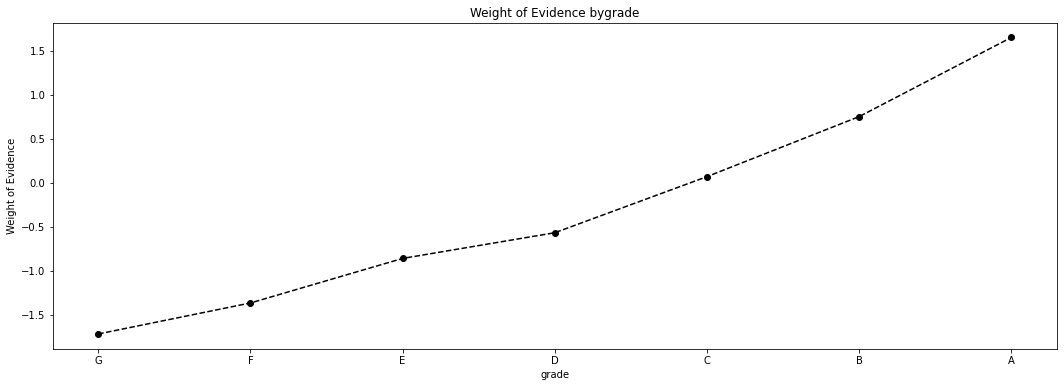

In [87]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [88]:
df_temp = woe_discrete(df_inputs_prepr, "home_ownership", df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,RENT,167644,0.976933,0.398115,163777.0,3867.0,0.396321,0.492549,-0.217368,NaN,inf
1,OWN,45766,0.980750,0.108684,44885.0,881.0,0.108616,0.112215,-0.032594,0.184775,inf
2,MORTGAGE,207682,0.985059,0.493196,204579.0,3103.0,0.495057,0.395236,0.225190,0.257784,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,inf,inf


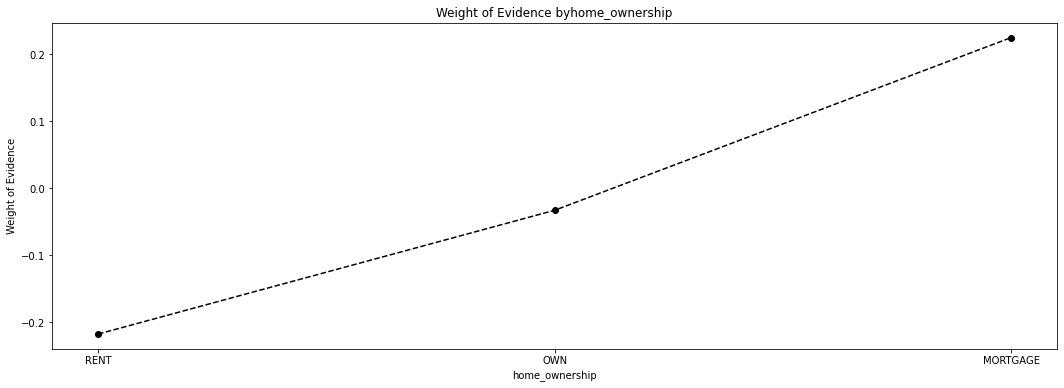

In [89]:
plot_by_woe(df_temp)

In [90]:
df_inputs_prepr["home_ownership:RENT_ANY"] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY']])

Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [91]:
df_inputs_prepr["addr_state"].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [92]:
df_temp = woe_discrete(df_inputs_prepr, "addr_state", df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,NV,5924,0.969953,0.014068,5746.0,178.0,0.013905,0.022672,-0.488919,NaN,inf
1,SD,835,0.970060,0.001983,810.0,25.0,0.001960,0.003184,-0.485236,0.003683,inf
2,HI,2083,0.973596,0.004947,2028.0,55.0,0.004908,0.007005,-0.355923,0.129314,inf
3,OK,3968,0.976310,0.009423,3874.0,94.0,0.009375,0.011973,-0.244647,0.111276,inf
4,AK,954,0.977987,0.002266,933.0,21.0,0.002258,0.002675,-0.169512,0.075135,inf
5,NY,33844,0.978253,0.080372,33108.0,736.0,0.080118,0.093746,-0.157095,0.012417,inf
6,AL,5347,0.978306,0.012698,5231.0,116.0,0.012658,0.014775,-0.154627,0.002467,inf
7,UT,2836,0.978491,0.006735,2775.0,61.0,0.006715,0.007770,-0.145863,0.008765,inf
8,WY,900,0.978889,0.002137,881.0,19.0,0.002132,0.002420,-0.126776,0.019086,inf
9,FL,29298,0.979111,0.069576,28686.0,612.0,0.069417,0.077952,-0.115963,0.010814,inf


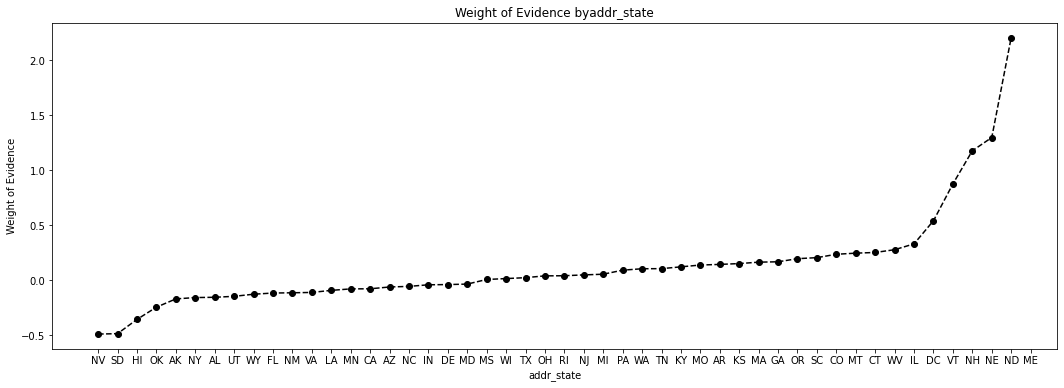

In [93]:
plot_by_woe(df_temp)

In [94]:
if ["addr_state:ND"] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ND"] = 0

In [95]:
if ["addr_state:ID"] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ID"] = 0

In [96]:
if ["addr_state:IA"] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:IA"] = 0

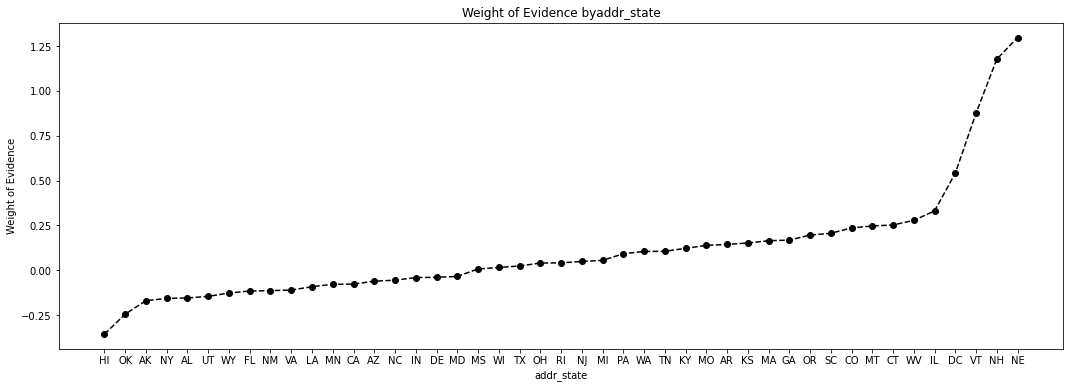

In [97]:
plot_by_woe(df_temp.iloc[2: -2, :])

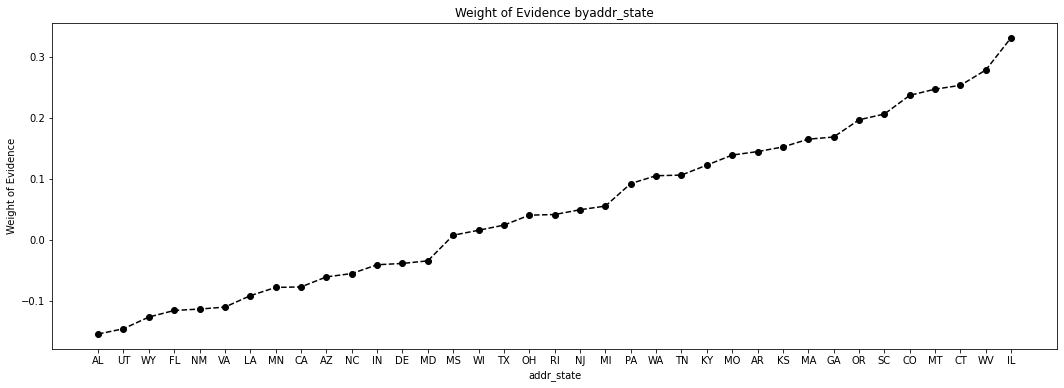

In [98]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [99]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr["addr_state:ND_NE_IA_NV_FL_HI_AL"] = sum([df_inputs_prepr["addr_state:ND"], df_inputs_prepr["addr_state:NE"],
                                                df_inputs_prepr["addr_state:IA"], df_inputs_prepr["addr_state:NV"], 
                                                df_inputs_prepr["addr_state:FL"], df_inputs_prepr["addr_state:HI"], 
                                                df_inputs_prepr["addr_state:AL"]])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

Notes: Other discrete variables preprocessing

In [100]:
df_temp=woe_discrete(df_inputs_prepr, "verification_status", df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,Verified,123016,0.976532,0.292134,120129.0,2887.0,0.290698,0.367724,-0.235047,NaN,0.046808
1,Source Verified,179565,0.981110,0.426425,176173.0,3392.0,0.426318,0.432047,-0.013348,0.221698,0.046808
2,Not Verified,118513,0.986736,0.281441,116941.0,1572.0,0.282984,0.200229,0.345926,0.359274,0.046808


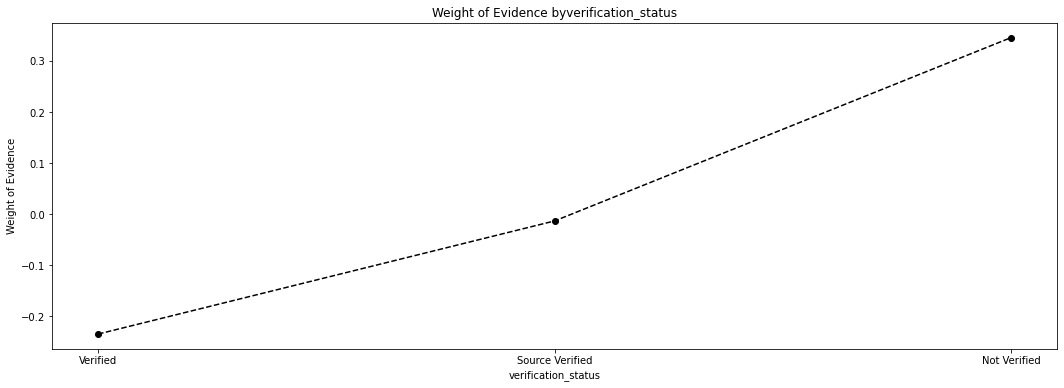

In [101]:
plot_by_woe(df_temp)

In [102]:
df_temp = woe_discrete(df_inputs_prepr, "purpose", df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,wedding,4,0.750000,0.000009,3.0,1.0,0.000007,0.000127,-2.864783,NaN,inf
1,renewable_energy,224,0.955357,0.000532,214.0,10.0,0.000518,0.001274,-0.900004,1.964779,inf
2,small_business,3364,0.958680,0.007989,3225.0,139.0,0.007804,0.017705,-0.819181,0.080823,inf
3,moving,2420,0.965289,0.005747,2336.0,84.0,0.005653,0.010699,-0.638016,0.181164,inf
4,house,1438,0.967316,0.003415,1391.0,47.0,0.003366,0.005986,-0.575764,0.062252,inf
5,medical,3938,0.970797,0.009352,3823.0,115.0,0.009251,0.014648,-0.459536,0.116228,inf
6,major_purchase,7449,0.975970,0.017690,7270.0,179.0,0.017593,0.022800,-0.259269,0.200267,inf
7,other,19204,0.976672,0.045605,18756.0,448.0,0.045387,0.057063,-0.228919,0.030350,inf
8,vacation,2249,0.977768,0.005341,2199.0,50.0,0.005321,0.006369,-0.179660,0.049259,inf
9,debt_consolidation,250020,0.979878,0.593739,244989.0,5031.0,0.592845,0.640810,-0.077800,0.101860,inf


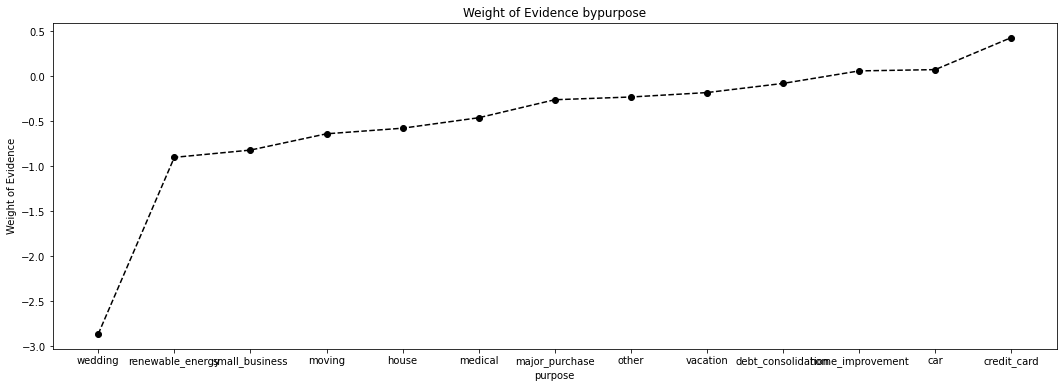

In [103]:
plot_by_woe(df_temp)

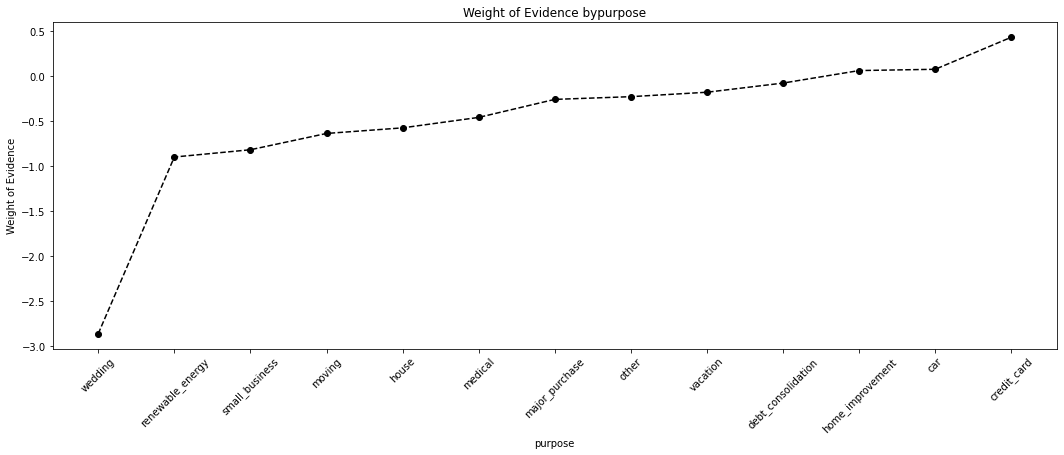

In [104]:
plot_by_woe(df_temp, 45)

In [105]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [106]:
df_temp = woe_discrete(df_inputs_prepr, "initial_list_status", df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,f,153843,0.972550,0.365341,149620.0,4223.0,0.362063,0.537893,-0.395842,NaN,0.126296
1,w,267251,0.986425,0.634659,263623.0,3628.0,0.637937,0.462107,0.322444,0.718286,0.126296


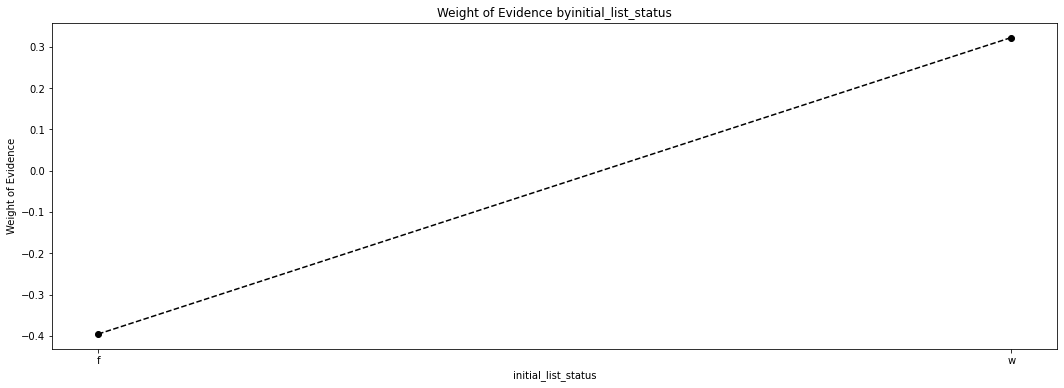

In [107]:
plot_by_woe(df_temp)

Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [108]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    # this statement will overwrite the original df variable with a two column dataframe, the independent variable and the dependent variable.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], "n_obs", "prop_good"]
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    # df = df.sort_values(["WoE"])
    # df = df.reset_index(drop = True)
    df["diffe_Woe"] = df["WoE"].diff().abs()
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [109]:
df_inputs_prepr["term_int"].unique()

array([60, 36])

In [110]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "term_int", df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,36,283172,0.983533,0.672467,278509.0,4663.0,0.673959,0.593937,0.126396,NaN,0.027678
1,60,137922,0.976885,0.327533,134734.0,3188.0,0.326041,0.406063,-0.219486,0.345883,0.027678


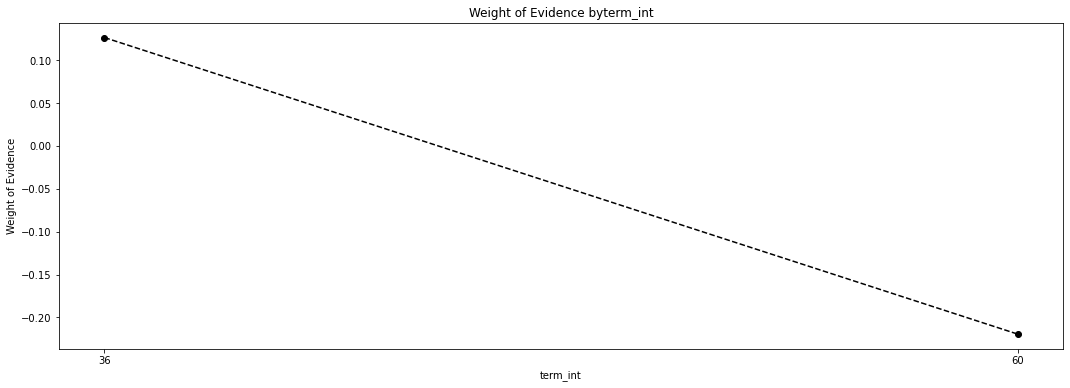

In [111]:
plot_by_woe(df_temp)

In [112]:
df_inputs_prepr["term: 36"] = np.where((df_inputs_prepr["term_int"] == 36), 1, 0)
df_inputs_prepr["term: 60"] = np.where((df_inputs_prepr["term_int"] == 60), 1, 0)

Notes: 60 months loan are much riskier. We will give all 36 months term, value 1. Else, 0
Notes: np.where(condition, value if true, value if false) checks whether a condition is true; returns a particular value if the condition is true and a particular value if it is false.

In [113]:
df_inputs_prepr["emp_length_int"].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [114]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "emp_length_int", df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,58157,0.977733,0.138109,56862.0,1295.0,0.137599,0.164947,-0.181278,NaN,0.019134
1,1.0,27473,0.977687,0.065242,26860.0,613.0,0.064998,0.078079,-0.183366,0.002088,0.019134
2,2.0,37497,0.980932,0.089047,36782.0,715.0,0.089008,0.091071,-0.022914,0.160453,0.019134
3,3.0,33430,0.980975,0.079388,32794.0,636.0,0.079358,0.081009,-0.020593,0.002321,0.019134
4,4.0,24506,0.979678,0.058196,24008.0,498.0,0.058097,0.063431,-0.087853,0.067260,0.019134
5,5.0,24930,0.980866,0.059203,24453.0,477.0,0.059173,0.060757,-0.026403,0.061449,0.019134
6,6.0,16838,0.978976,0.039986,16484.0,354.0,0.039889,0.045090,-0.122546,0.096143,0.019134
7,7.0,18414,0.979201,0.043729,18031.0,383.0,0.043633,0.048784,-0.111582,0.010964,0.019134
8,8.0,21560,0.983905,0.051200,21213.0,347.0,0.051333,0.044198,0.149650,0.261232,0.019134
9,9.0,16769,0.982289,0.039822,16472.0,297.0,0.039860,0.037830,0.052290,0.097360,0.019134


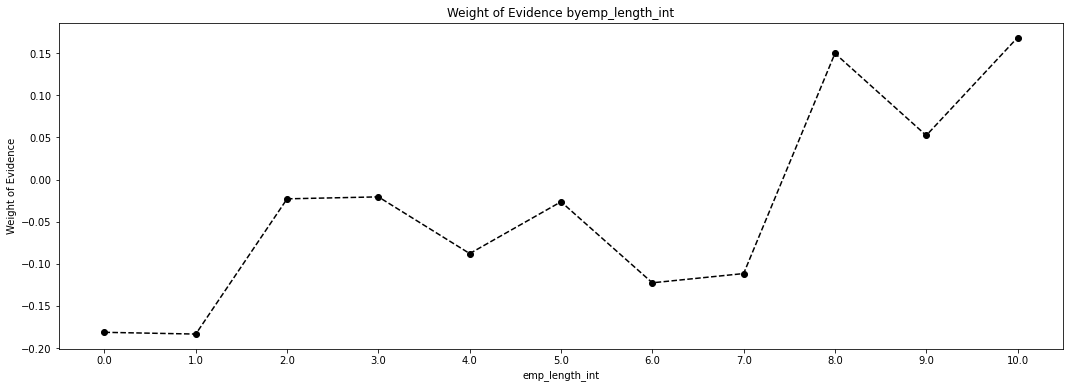

In [115]:
plot_by_woe(df_temp)

In [116]:
df_inputs_prepr["emp_length:0"] = np.where(df_inputs_prepr["emp_length_int"].isin([0]), 1, 0)
df_inputs_prepr["emp_length:1"] = np.where(df_inputs_prepr["emp_length_int"].isin([1]), 1, 0)
df_inputs_prepr["emp_length:2-4"] = np.where(df_inputs_prepr["emp_length_int"].isin([range(2,5)]), 1, 0)
df_inputs_prepr["emp_length:5-6"] = np.where(df_inputs_prepr["emp_length_int"].isin([range(5,7)]), 1, 0)
df_inputs_prepr["emp_length:7-9"] = np.where(df_inputs_prepr["emp_length_int"].isin([range(7,10)]), 1, 0)
df_inputs_prepr["emp_length:10"] = np.where(df_inputs_prepr["emp_length_int"].isin([10]), 1, 0)

Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [117]:
df_inputs_prepr["mths_since_issue_date"].unique()

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [118]:
#We want to divide the above values into 50 categories since it's easy to work with < 50 categories
#Fine classing

df_inputs_prepr["mths_since_issue_date_factor"] = pd.cut(df_inputs_prepr["mths_since_issue_date"], 50)
df_inputs_prepr["mths_since_issue_date_factor"]

0         (23.989, 24.22]
1         (23.989, 24.22]
2         (23.989, 24.22]
3         (23.989, 24.22]
4         (23.989, 24.22]
               ...       
421089      (34.78, 35.0]
421090      (34.78, 35.0]
421091      (34.78, 35.0]
421092      (34.78, 35.0]
421093      (34.78, 35.0]
Name: mths_since_issue_date_factor, Length: 421094, dtype: category
Categories (50, interval[float64, right]): [(23.989, 24.22] < (24.22, 24.44] < (24.44, 24.66] < (24.66, 24.88] ... (34.12, 34.34] < (34.34, 34.56] < (34.56, 34.78] < (34.78, 35.0]]

Note: pd.cut(series, number of categories) creates a new series which is a categorical variable with as many number of categories as specified, indicating the interval where each observation from the series lies.

In [119]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_issue_date_factor", df_targets_prepr)
df_temp

,mths_since_issue_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(23.989, 24.22]",44342,1.000000,0.105302,44342.0,0.0,0.107302,0.000000,inf,NaN,inf
1,"(24.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(24.44, 24.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(24.66, 24.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(24.88, 25.1]",37530,0.998082,0.089125,37458.0,72.0,0.090644,0.009171,2.290915,NaN,inf
5,"(25.1, 25.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(25.32, 25.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(25.54, 25.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(25.76, 25.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(25.98, 26.2]",48631,0.997327,0.115487,48501.0,130.0,0.117367,0.016558,1.958410,NaN,inf


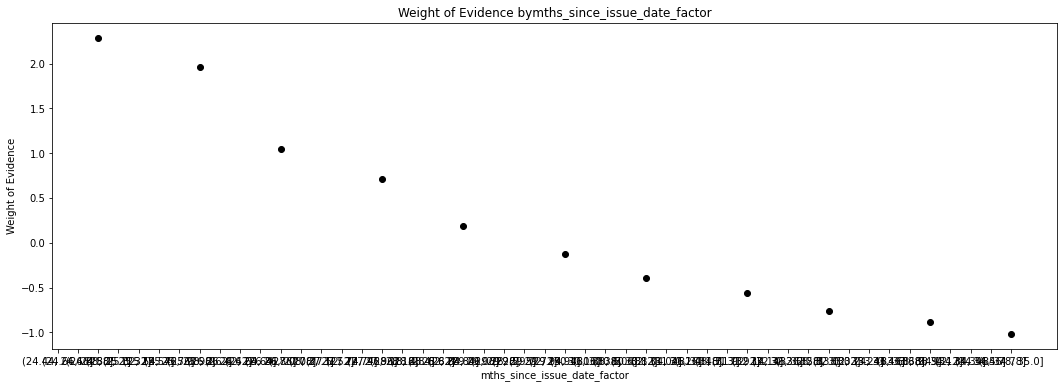

In [120]:
plot_by_woe(df_temp)

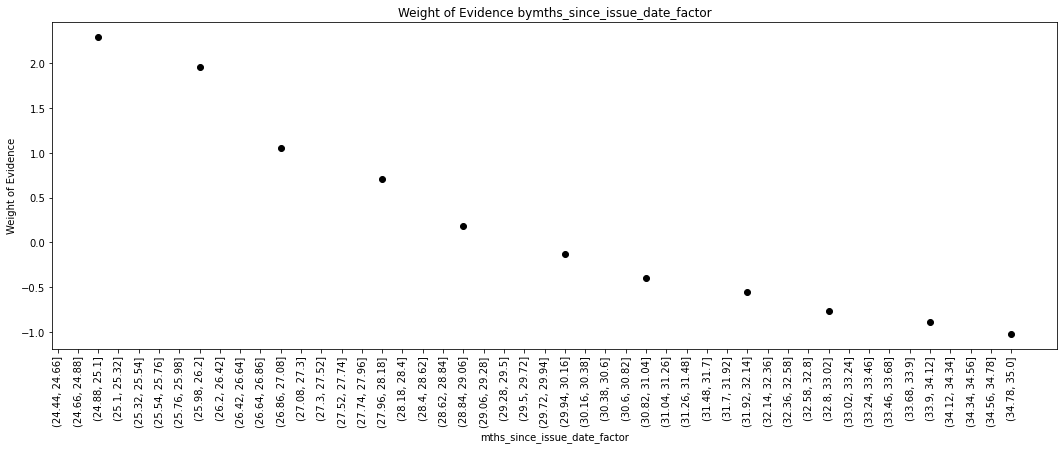

In [121]:
plot_by_woe(df_temp, 90)

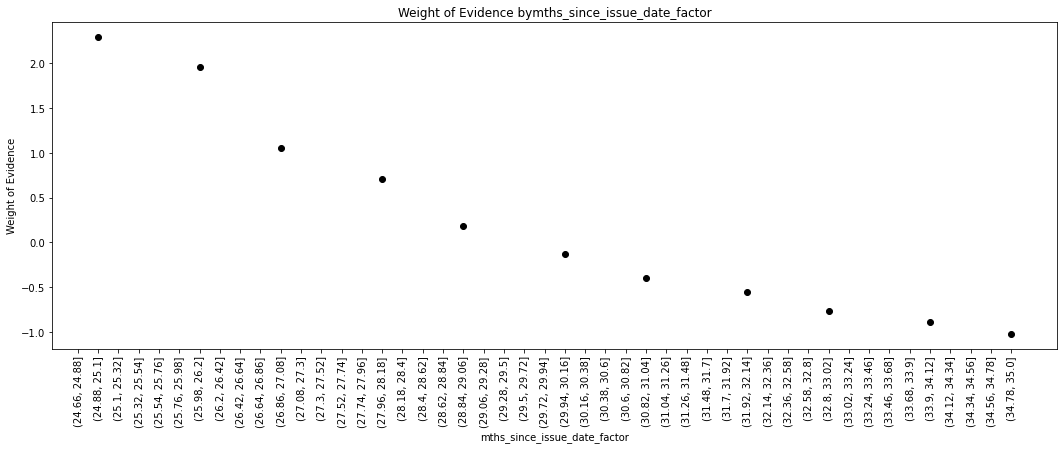

In [122]:
plot_by_woe(df_temp.iloc[3: , :], 90)

In [123]:
df_inputs_prepr['mths_since_issue_date_factor:<38'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:38-39'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(38,40)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:40-41'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(40,42)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:42-48'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(42,49)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:49-52'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(49,53)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:53-64'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(53,65)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:65-84'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(65,85)), 1, 0)
df_inputs_prepr['mths_since_issue_date_factor:>84'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(85, int(df_inputs_prepr["mths_since_issue_date"].max()))), 1, 0)

In [124]:
df_inputs_prepr["int_rate_factor"] = pd.cut(df_inputs_prepr["int_rate"], 50)

In [125]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "int_rate_factor", df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(5.296, 5.793]",9651,0.999689,0.022919,9648.0,3.0,0.023347,0.000382,4.112499,NaN,inf
1,"(5.793, 6.267]",10214,0.997259,0.024256,10186.0,28.0,0.024649,0.003566,1.933170,2.179329,inf
2,"(6.267, 6.74]",6530,0.994793,0.015507,6496.0,34.0,0.015720,0.004331,1.289186,0.643984,inf
3,"(6.74, 7.214]",12488,0.995275,0.029656,12429.0,59.0,0.030077,0.007515,1.386855,0.097669,inf
4,"(7.214, 7.687]",11416,0.997985,0.027110,11393.0,23.0,0.027570,0.002930,2.241865,0.855010,inf
5,"(7.687, 8.16]",20636,0.995687,0.049006,20547.0,89.0,0.049721,0.011336,1.478439,0.763426,inf
6,"(8.16, 8.634]",22498,0.994133,0.053428,22366.0,132.0,0.054123,0.016813,1.169100,0.309339,inf
7,"(8.634, 9.107]",2020,0.979703,0.004797,1979.0,41.0,0.004789,0.005222,-0.086620,1.255720,inf
8,"(9.107, 9.581]",22171,0.992783,0.052651,22011.0,160.0,0.053264,0.020380,0.960729,1.047349,inf
9,"(9.581, 10.054]",22364,0.993829,0.053109,22226.0,138.0,0.053784,0.017577,1.118369,0.157641,inf


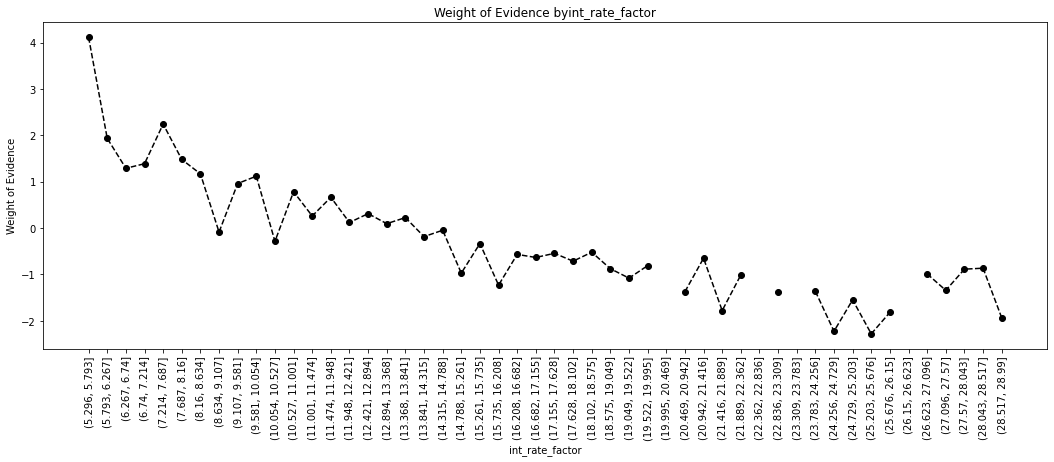

In [126]:
plot_by_woe(df_temp, 90)

In [127]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [128]:
df_inputs_prepr["funded_amnt_factor"] = pd.cut(df_inputs_prepr["funded_amnt"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(966.0, 1680.0]",3391,0.982306,0.008053,3331.0,60.0,0.008061,0.007642,0.053288,NaN,0.027107
1,"(1680.0, 2360.0]",3751,0.981338,0.008908,3681.0,70.0,0.008908,0.008916,-0.000950,0.054239,0.027107
2,"(2360.0, 3040.0]",8134,0.981190,0.019316,7981.0,153.0,0.019313,0.019488,-0.009014,0.008063,0.027107
3,"(3040.0, 3720.0]",5133,0.983246,0.012190,5047.0,86.0,0.012213,0.010954,0.108807,0.117821,0.027107
4,"(3720.0, 4400.0]",7315,0.980041,0.017371,7169.0,146.0,0.017348,0.018596,-0.069480,0.178287,0.027107
5,"(4400.0, 5080.0]",18150,0.982479,0.043102,17832.0,318.0,0.043151,0.040504,0.063304,0.132784,0.027107
6,"(5080.0, 5760.0]",5617,0.984867,0.013339,5532.0,85.0,0.013387,0.010827,0.212259,0.148955,0.027107
7,"(5760.0, 6440.0]",16224,0.982618,0.038528,15942.0,282.0,0.038578,0.035919,0.071410,0.140848,0.027107
8,"(6440.0, 7120.0]",10565,0.982489,0.025089,10380.0,185.0,0.025118,0.023564,0.063885,0.007525,0.027107
9,"(7120.0, 7800.0]",8423,0.980173,0.020003,8256.0,167.0,0.019979,0.021271,-0.062693,0.126579,0.027107


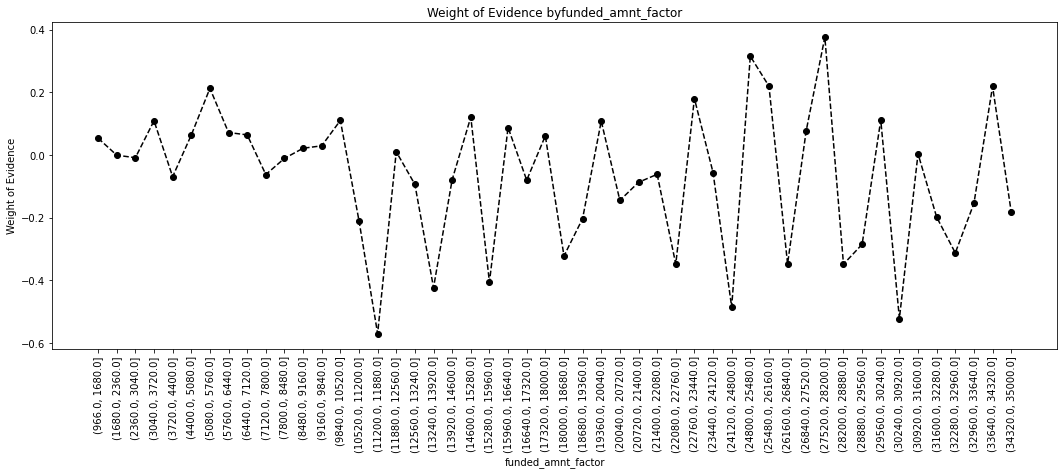

In [129]:
plot_by_woe(df_temp, 90)

Notes: funded_amnt_factor varies greatly. There seems to be no association between WOE and funded_amt_factor.So, we won't use this variable in our PD model.

Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [130]:
df_inputs_prepr["annual_inc_factor"] = pd.cut(df_inputs_prepr["annual_inc"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, "annual_inc_factor", df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-9500.0, 190000.0]",409693,0.981193,0.972925,401988.0,7705.0,0.972764,0.981404,-0.008842,NaN,inf
1,"(190000.0, 380000.0]",10007,0.986609,0.023764,9873.0,134.0,0.023892,0.017068,0.336324,0.345166,inf
2,"(380000.0, 570000.0]",943,0.990456,0.002239,934.0,9.0,0.002260,0.001146,0.678857,0.342533,inf
3,"(570000.0, 760000.0]",257,1.000000,0.000610,257.0,0.0,0.000622,0.000000,inf,inf,inf
4,"(760000.0, 950000.0]",70,1.000000,0.000166,70.0,0.0,0.000169,0.000000,inf,NaN,inf
5,"(950000.0, 1140000.0]",43,1.000000,0.000102,43.0,0.0,0.000104,0.000000,inf,NaN,inf
6,"(1140000.0, 1330000.0]",20,0.950000,0.000047,19.0,1.0,0.000046,0.000127,-1.018956,inf,inf
7,"(1330000.0, 1520000.0]",14,1.000000,0.000033,14.0,0.0,0.000034,0.000000,inf,inf,inf
8,"(1520000.0, 1710000.0]",3,0.666667,0.000007,2.0,1.0,0.000005,0.000127,-3.270248,inf,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000012,5.0,0.0,0.000012,0.000000,inf,inf,inf


Notes: 94% of the observations are in one category. It seems that 50 categories weren't enough to split our data well. Let's split into 100 categories.

In [131]:
df_inputs_prepr["annual_inc_factor"] = pd.cut(df_inputs_prepr["annual_inc"], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, "annual_inc_factor", df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-9500.0, 95000.0]",325648,0.980203,0.773338,319201.0,6447.0,0.772429,0.821169,-0.061189,NaN,inf
1,"(95000.0, 190000.0]",84045,0.985032,0.199587,82787.0,1258.0,0.200335,0.160234,0.223353,0.284542,inf
2,"(190000.0, 285000.0]",8186,0.986196,0.019440,8073.0,113.0,0.019536,0.014393,0.305498,0.082145,inf
3,"(285000.0, 380000.0]",1821,0.988468,0.004324,1800.0,21.0,0.004356,0.002675,0.487625,0.182127,inf
4,"(380000.0, 475000.0]",652,0.990798,0.001548,646.0,6.0,0.001563,0.000764,0.715645,0.228021,inf
5,"(475000.0, 570000.0]",291,0.989691,0.000691,288.0,3.0,0.000697,0.000382,0.600953,0.114692,inf
6,"(570000.0, 665000.0]",165,1.000000,0.000392,165.0,0.0,0.000399,0.000000,inf,inf,inf
7,"(665000.0, 760000.0]",92,1.000000,0.000218,92.0,0.0,0.000223,0.000000,inf,NaN,inf
8,"(760000.0, 855000.0]",46,1.000000,0.000109,46.0,0.0,0.000111,0.000000,inf,NaN,inf
9,"(855000.0, 950000.0]",24,1.000000,0.000057,24.0,0.0,0.000058,0.000000,inf,NaN,inf


Notes: This makes sense since there are very few people with high incomes but a lot with low incomes. Let's set a threshold of $140,000 (first 2 categories have a lot of obs.). Above threshold: high income, Below threshold: low income

In [132]:
# low income dataframe

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr["annual_inc"] <= 140000, : ]

In [133]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp["annual_inc"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, "annual_inc_factor", df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/2600188143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp["annual_inc"], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-140.0, 2800.0]",4,1.000000,0.000010,4.0,0.0,0.000010,0.000000,inf,NaN,inf
1,"(2800.0, 5600.0]",12,0.916667,0.000031,11.0,1.0,0.000029,0.000135,-1.547375,inf,inf
2,"(5600.0, 8400.0]",55,0.981818,0.000141,54.0,1.0,0.000141,0.000135,0.043714,1.591089,inf
3,"(8400.0, 11200.0]",429,0.965035,0.001097,414.0,15.0,0.001079,0.002022,-0.627454,0.671168,inf
4,"(11200.0, 14000.0]",873,0.977090,0.002233,853.0,20.0,0.002224,0.002695,-0.192243,0.435212,inf
5,"(14000.0, 16800.0]",1339,0.973114,0.003425,1303.0,36.0,0.003397,0.004852,-0.356364,0.164122,inf
6,"(16800.0, 19600.0]",1808,0.966814,0.004624,1748.0,60.0,0.004558,0.008086,-0.573387,0.217023,inf
7,"(19600.0, 22400.0]",3823,0.972273,0.009778,3717.0,106.0,0.009691,0.014286,-0.388037,0.185350,inf
8,"(22400.0, 25200.0]",6445,0.973933,0.016485,6277.0,168.0,0.016366,0.022642,-0.324587,0.063450,inf
9,"(25200.0, 28000.0]",5904,0.977134,0.015101,5769.0,135.0,0.015041,0.018194,-0.190291,0.134296,inf


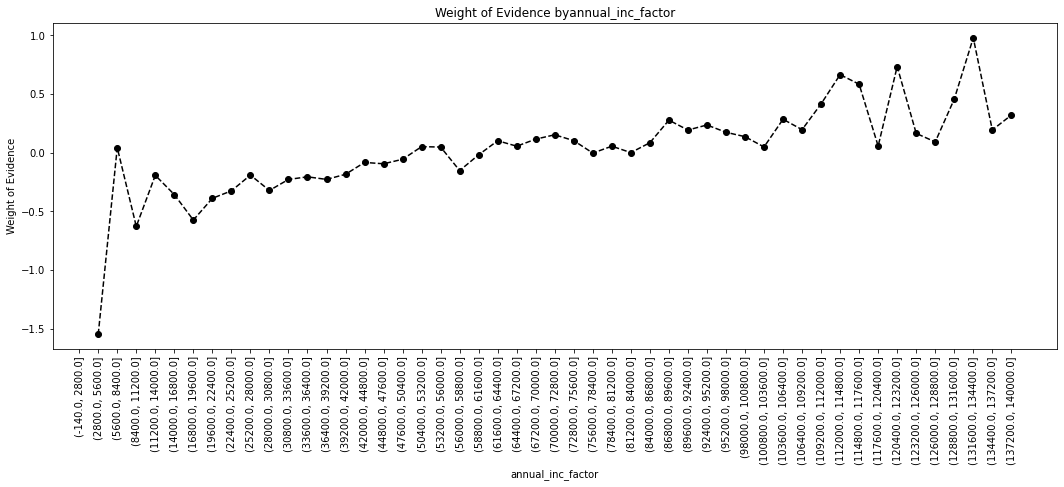

In [134]:
plot_by_woe(df_temp, 90)

Notes: We will split with a width of $10000, but first and last category will have low no. of values.So, let's make sure first and last 2 categories have a width of $20000. The intervals from $20k to $100k will have a width of $10k.

In [135]:
df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [136]:
df_inputs_prepr["mths_since_earliest_cr_line"].unique()

array([334., 197.,  77., 228., 208., 193., 192., 172., 362., 296., 422.,
       234., 187., 183., 195., 153., 205., 111., 277., 403., 196., 203.,
       230., 158., 240., 318., 258., 198., 100., 319., 244., 384., 190.,
       346., 210., 191., 166., 135., 330., 307., 201., 180., 284., 131.,
       262., 186.,  74., 188., 227., 239., 152., 123., 134., 150., 155.,
       291., 145., 364., 217., 162., 138., 332., 270., 181., 376., 176.,
        83.,  97., 112., 272., 283., 254., 200., 161., 159., 279.,  70.,
       216., 246., 218., 207., 115., 263., 171., 226., 160., 146., 169.,
       189., 289., 360., 126., 199., 211., 139., 128., 358., 163., 182.,
       167., 344., 411., 339., 118., 140., 320., 220., 290., 164.,  67.,
       202., 175., 361., 343., 105., 119., 438., 170., 480., 214., 414.,
       261., 184., 235., 483., 327., 520., 391., 251., 274.,  76., 204.,
       223., 225., 213., 356., 313., 253., 232., 308., 156., 257., 385.,
       458.,  96., 293., 110., 249., 416., 173., 20

In [137]:
df_inputs_prepr["mths_since_earliest_cr_line_factor"] = pd.cut(df_inputs_prepr["mths_since_earliest_cr_line"], 50)
df_inputs_prepr["mths_since_earliest_cr_line_factor"]

0          (324.0, 334.52]
1         (187.24, 197.76]
2           (71.52, 82.04]
3          (218.8, 229.32]
4         (197.76, 208.28]
                ...       
421089     (155.68, 166.2]
421090     (523.88, 534.4]
421091     (166.2, 176.72]
421092     (166.2, 176.72]
421093    (187.24, 197.76]
Name: mths_since_earliest_cr_line_factor, Length: 421094, dtype: category
Categories (50, interval[float64, right]): [(60.474, 71.52] < (71.52, 82.04] < (82.04, 92.56] < (92.56, 103.08] ... (544.92, 555.44] < (555.44, 565.96] < (565.96, 576.48] < (576.48, 587.0]]

In [138]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_earliest_cr_line_factor", df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(60.474, 71.52]",2001,0.984508,0.004752,1970.0,31.0,0.004767,0.003949,0.188407,NaN,0.040048
1,"(71.52, 82.04]",4886,0.974417,0.011603,4761.0,125.0,0.011521,0.015922,-0.323496,0.511902,0.040048
2,"(82.04, 92.56]",4610,0.972017,0.010948,4481.0,129.0,0.010843,0.016431,-0.415606,0.092110,0.040048
3,"(92.56, 103.08]",5446,0.975762,0.012933,5314.0,132.0,0.012859,0.016813,-0.268097,0.147509,0.040048
4,"(103.08, 113.6]",6146,0.968272,0.014595,5951.0,195.0,0.014401,0.024838,-0.545080,0.276983,0.040048
5,"(113.6, 124.12]",10200,0.978137,0.024223,9977.0,223.0,0.024143,0.028404,-0.162529,0.382551,0.040048
6,"(124.12, 134.64]",11155,0.974361,0.026491,10869.0,286.0,0.026302,0.036428,-0.325717,0.163188,0.040048
7,"(134.64, 145.16]",15641,0.977111,0.037144,15283.0,358.0,0.036983,0.045599,-0.209431,0.116285,0.040048
8,"(145.16, 155.68]",18480,0.979275,0.043886,18097.0,383.0,0.043793,0.048784,-0.107928,0.101503,0.040048
9,"(155.68, 166.2]",24374,0.977066,0.057883,23815.0,559.0,0.057630,0.071201,-0.211473,0.103545,0.040048


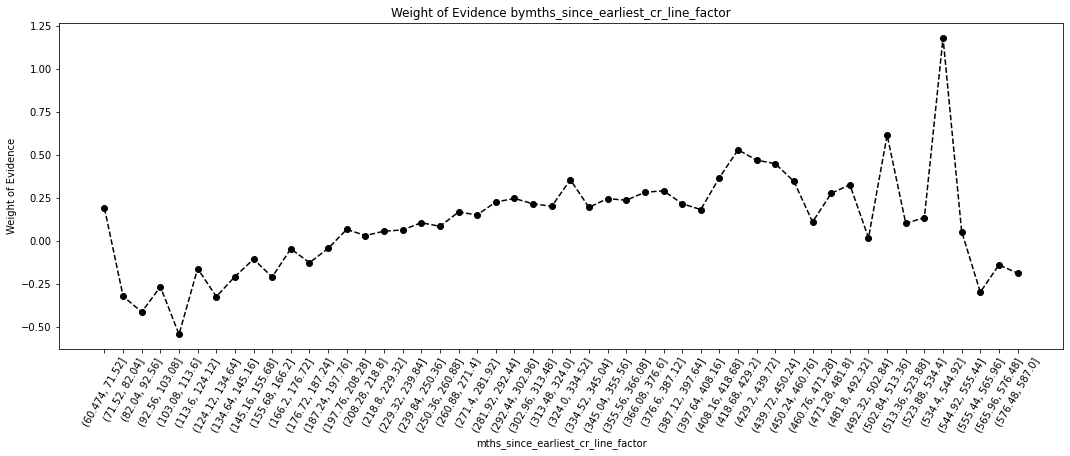

In [139]:
plot_by_woe(df_temp, 60)

In [140]:
df_inputs_prepr['mths_since_earliest_cr_line_factor:<70'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(70)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:70-93'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(70,93)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:94-140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(94,140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:141-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(141-270)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(271,352)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:353-410'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(353,410)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:411-563'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(411,563)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor:>563'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(563, int(df_inputs_prepr["mths_since_earliest_cr_line"].max()))), 1, 0)

In [141]:
df_inputs_prepr["mths_since_last_delinq"].isnull().sum()

203961

Notes: there are a lot of missing values in this variable. So we will create a dummy variable which is 1 when the value is missing and 0 otherwise.

In [142]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr["mths_since_last_delinq"])]
df_inputs_prepr_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_delinq"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, "mths_since_last_delinq_factor", df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/796278772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_delinq"], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-0.176, 3.52]",7261,0.973833,0.033440,7071.0,190.0,0.033183,0.047041,-0.349003,NaN,inf
1,"(3.52, 7.04]",15763,0.978367,0.072596,15422.0,341.0,0.072372,0.084427,-0.154068,0.194935,inf
2,"(7.04, 10.56]",12365,0.980348,0.056947,12122.0,243.0,0.056886,0.060163,-0.056020,0.098048,inf
3,"(10.56, 14.08]",16125,0.979721,0.074263,15798.0,327.0,0.074136,0.080961,-0.088058,0.032037,inf
4,"(14.08, 17.6]",11384,0.976985,0.052429,11122.0,262.0,0.052193,0.064868,-0.217400,0.129343,inf
5,"(17.6, 21.12]",14291,0.983626,0.065817,14057.0,234.0,0.065966,0.057935,0.129818,0.347219,inf
6,"(21.12, 24.64]",10544,0.982170,0.048560,10356.0,188.0,0.048598,0.046546,0.043143,0.086675,inf
7,"(24.64, 28.16]",13761,0.981760,0.063376,13510.0,251.0,0.063399,0.062144,0.019996,0.023147,inf
8,"(28.16, 31.68]",9867,0.985001,0.045442,9719.0,148.0,0.045609,0.036643,0.218889,0.198893,inf
9,"(31.68, 35.2]",12583,0.985218,0.057951,12397.0,186.0,0.058176,0.046051,0.233727,0.014837,inf


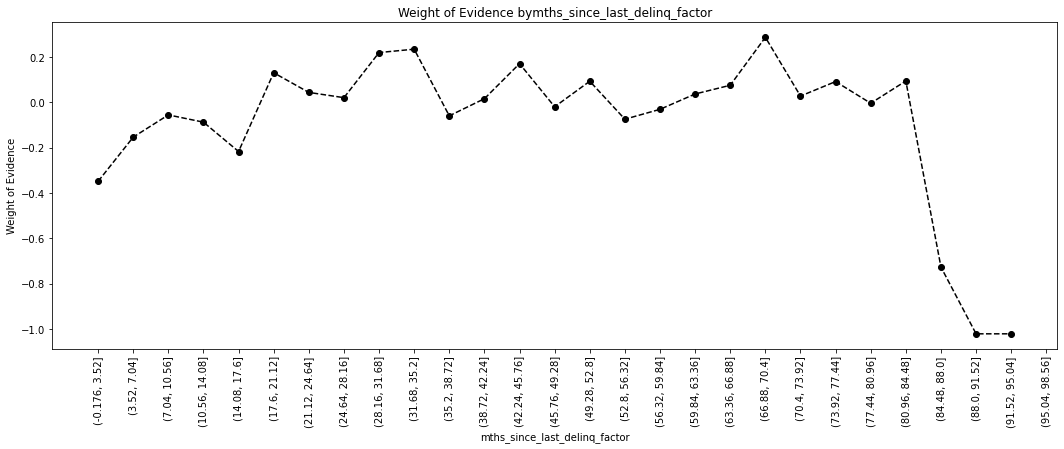

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] < 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] < 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] < 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [145]:
df_inputs_prepr["installment"]

0         778.38
1         260.50
2         146.16
3         222.40
4         432.66
           ...  
421089    332.10
421090    797.03
421091    316.07
421092    317.86
421093    664.20
Name: installment, Length: 421094, dtype: float64

In [146]:
unique_installment = []
for value in df_inputs_prepr["installment"]:
    if value not in unique_installment:
        unique_installment.append(value)

In [147]:
len(unique_installment)

40447

Notes: 上面这段没太看懂，但是解释如下：
When I used .unique() method, it didn't display all values in the list (it used ellipsis). To display all values I used a for loop and an if statement. To find the number of unique values, use len()

In [148]:
df_inputs_prepr["installment_factor"] = pd.cut(df_inputs_prepr["installment"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, "installment_factor", df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(28.705, 58.427]",3506,0.982886,0.008326,3446.0,60.0,0.008339,0.007642,0.087230,NaN,inf
1,"(58.427, 86.734]",5832,0.981310,0.013850,5723.0,109.0,0.013849,0.013884,-0.002494,0.089724,inf
2,"(86.734, 115.04]",8123,0.983134,0.019290,7986.0,137.0,0.019325,0.017450,0.102069,0.104564,inf
3,"(115.04, 143.347]",9139,0.982383,0.021703,8978.0,161.0,0.021726,0.020507,0.057733,0.044336,inf
4,"(143.347, 171.654]",17953,0.984459,0.042634,17674.0,279.0,0.042769,0.035537,0.185243,0.127510,inf
5,"(171.654, 199.961]",15515,0.985691,0.036845,15293.0,222.0,0.037007,0.028277,0.269078,0.083835,inf
6,"(199.961, 228.268]",16515,0.982864,0.039219,16232.0,283.0,0.039280,0.036046,0.085898,0.183180,inf
7,"(228.268, 256.574]",22043,0.983033,0.052347,21669.0,374.0,0.052436,0.047637,0.095987,0.010089,inf
8,"(256.574, 284.881]",25323,0.980966,0.060136,24841.0,482.0,0.060112,0.061393,-0.021088,0.117075,inf
9,"(284.881, 313.188]",24135,0.980443,0.057315,23663.0,472.0,0.057262,0.060120,-0.048706,0.027618,inf


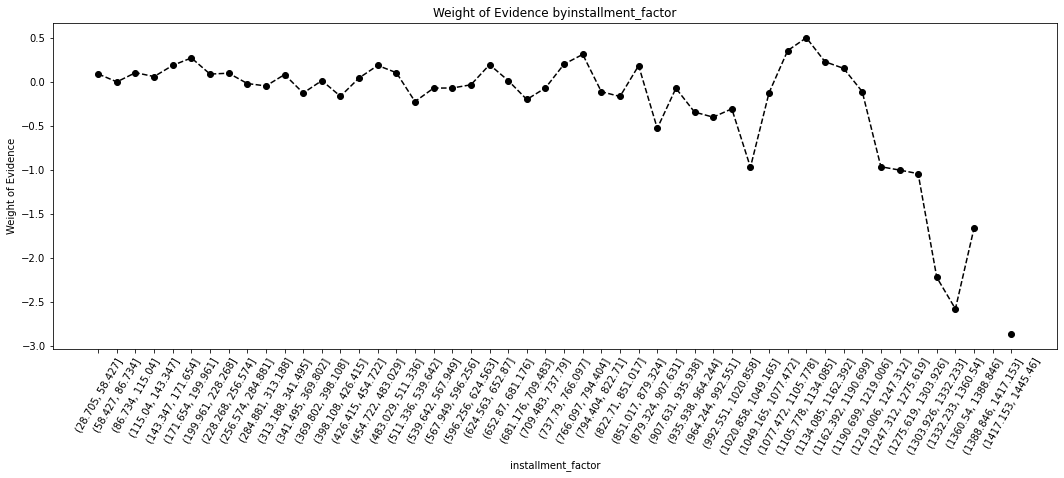

In [149]:
plot_by_woe(df_temp, 60)

In [150]:
df_inputs_prepr['installment_factor:<183'] = np.where(df_inputs_prepr['installment_factor'].isin(range(183)), 1, 0)
df_inputs_prepr['installment_factor:183-266'] = np.where(df_inputs_prepr['installment_factor'].isin(range(183,266)), 1, 0)
df_inputs_prepr['installment_factor:267-517'] = np.where(df_inputs_prepr['installment_factor'].isin(range(267,517)), 1, 0)
df_inputs_prepr['installment_factor:518-601'] = np.where(df_inputs_prepr['installment_factor'].isin(range(518,601)), 1, 0)
df_inputs_prepr['installment_factor:602-880'] = np.where(df_inputs_prepr['installment_factor'].isin(range(602,880)), 1, 0)
df_inputs_prepr['installment_factor:881-963'] = np.where(df_inputs_prepr['installment_factor'].isin(range(881,963)), 1, 0)
df_inputs_prepr['installment_factor:964-1075'] = np.where(df_inputs_prepr['installment_factor'].isin(range(964,1075)), 1, 0)
df_inputs_prepr['installment_factor:1076-1242'] = np.where(df_inputs_prepr['installment_factor'].isin(range(1076,1242)), 1, 0)
df_inputs_prepr['installment_factor:>1242'] = np.where(df_inputs_prepr['installment_factor'].isin(range(1242, int(df_inputs_prepr['installment'].max()))), 1, 0)

In [151]:
df_inputs_prepr["delinq_2yrs"].unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 15.,  7.,  9., 10.,  8., 11.,
       13., 14., 12., 30., 18., 16., 17., 26., 20., 19., 22., 27., 39.])

In [152]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "delinq_2yrs", df_targets_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,334007,0.981812,0.793189,327932.0,6075.0,0.793557,0.773787,0.025229,NaN,inf
1,1.0,57000,0.980246,0.135362,55874.0,1126.0,0.135209,0.143421,-0.058967,0.084197,inf
2,2.0,17241,0.979120,0.040943,16881.0,360.0,0.040850,0.045854,-0.115555,0.056588,inf
3,3.0,6293,0.976800,0.014944,6147.0,146.0,0.014875,0.018596,-0.223282,0.107727,inf
4,4.0,2949,0.976263,0.007003,2879.0,70.0,0.006967,0.008916,-0.246692,0.023410,inf
5,5.0,1475,0.978305,0.003503,1443.0,32.0,0.003492,0.004076,-0.154651,0.092041,inf
6,6.0,842,0.980998,0.002000,826.0,16.0,0.001999,0.002038,-0.019389,0.135262,inf
7,7.0,438,0.984018,0.001040,431.0,7.0,0.001043,0.000892,0.156803,0.176192,inf
8,8.0,284,0.982394,0.000674,279.0,5.0,0.000675,0.000637,0.058379,0.098424,inf
9,9.0,173,0.976879,0.000411,169.0,4.0,0.000409,0.000509,-0.219791,0.278170,inf


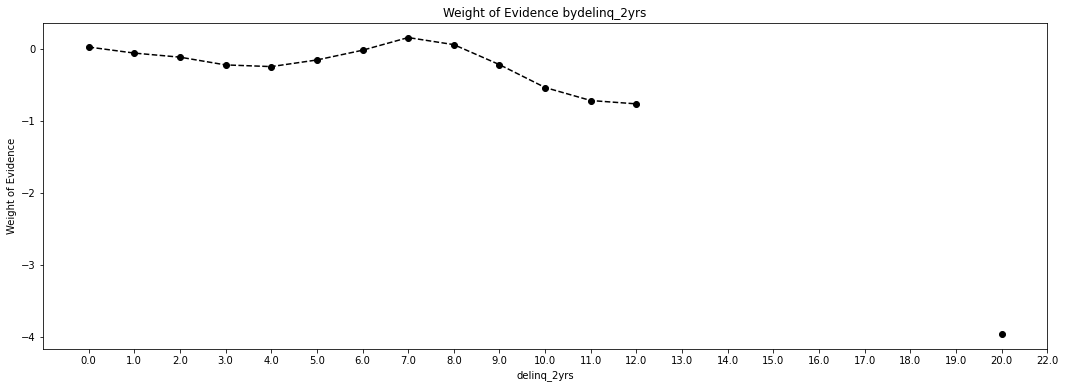

In [153]:
plot_by_woe(df_temp)

In [154]:
df_inputs_prepr['delinq_2yrs:<4'] = np.where(df_inputs_prepr['delinq_2yrs'].isin(range(0,3)), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where(df_inputs_prepr['delinq_2yrs'].isin(range(4,21)), 1, 0)

In [155]:
df_inputs_prepr['inq_last_6mths'].unique()

array([0., 1., 3., 4., 2., 5., 6.])

In [156]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "inq_last_6mths", df_targets_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,256407,0.984813,0.608907,252513.0,3894.0,0.611052,0.495988,0.208631,NaN,0.06837
1,1.0,111346,0.978571,0.264421,108960.0,2386.0,0.263671,0.303910,-0.142032,0.350663,0.06837
2,2.0,36292,0.973438,0.086185,35328.0,964.0,0.085490,0.122787,-0.362055,0.220023,0.06837
3,3.0,12272,0.964635,0.029143,11838.0,434.0,0.028647,0.055280,-0.657369,0.295314,0.06837
4,4.0,3517,0.966164,0.008352,3398.0,119.0,0.008223,0.015157,-0.611576,0.045793,0.06837
5,5.0,1217,0.957272,0.002890,1165.0,52.0,0.002819,0.006623,-0.854162,0.242586,0.06837
6,6.0,43,0.953488,0.000102,41.0,2.0,0.000099,0.000255,-0.942970,0.088808,0.06837


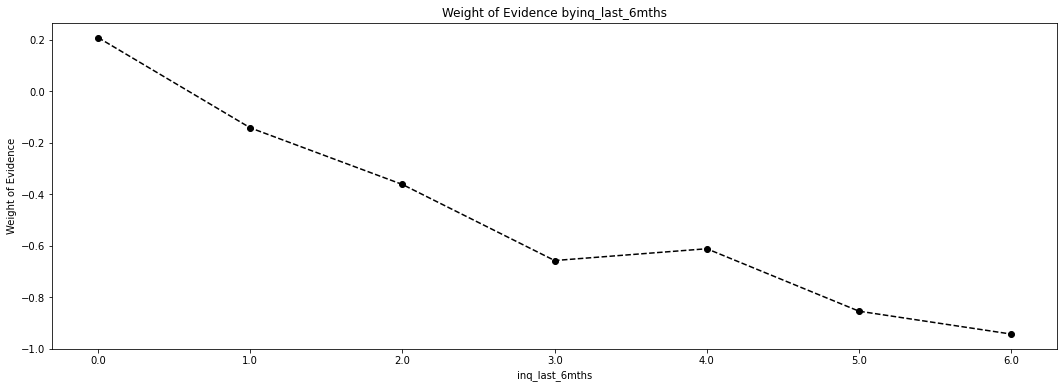

In [157]:
plot_by_woe(df_temp)

In [158]:
df_inputs_prepr['inq_last_6mths:0-3'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(0,4)), 1, 0)
df_inputs_prepr['inq_last_6mths:4-6'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(4,7)), 1, 0)
df_inputs_prepr['inq_last_6mths:>=6'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(6,18)), 1, 0)

In [159]:
df_inputs_prepr["open_acc"].unique()

array([17., 15.,  6., 10.,  7.,  9.,  5., 30., 12., 21., 18., 13.,  8.,
       16.,  4., 11., 33., 14.,  3., 28., 19., 24., 20., 22., 29., 27.,
       23., 25., 26., 34., 46.,  2., 35., 32., 40., 55., 37., 39., 31.,
       36., 38., 47., 44.,  1., 42., 41., 43., 52., 45., 53., 65., 51.,
       58., 67., 49., 50., 57., 48., 66., 54., 68., 61., 70., 60., 56.,
       82., 63., 59., 64., 62., 79., 74., 90.])

In [160]:
df_inputs_prepr["open_acc_factor"] = pd.cut(df_inputs_prepr["open_acc"], 50)
df_inputs_prepr["open_acc_factor"]

0         (15.24, 17.02]
1         (13.46, 15.24]
2           (4.56, 6.34]
3           (9.9, 11.68]
4           (4.56, 6.34]
               ...      
421089       (8.12, 9.9]
421090      (4.56, 6.34]
421091       (8.12, 9.9]
421092    (15.24, 17.02]
421093      (6.34, 8.12]
Name: open_acc_factor, Length: 421094, dtype: category
Categories (50, interval[float64, right]): [(0.911, 2.78] < (2.78, 4.56] < (4.56, 6.34] < (6.34, 8.12] ... (82.88, 84.66] < (84.66, 86.44] < (86.44, 88.22] < (88.22, 90.0]]

In [161]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)
df_temp

,open_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(0.911, 2.78]",1076,0.973978,0.002555,1048.0,28.0,0.002536,0.003566,-0.340961,NaN,inf
1,"(2.78, 4.56]",14898,0.980467,0.035379,14607.0,291.0,0.035347,0.037065,-0.047462,0.293499,inf
2,"(4.56, 6.34]",43339,0.980595,0.102920,42498.0,841.0,0.102840,0.107120,-0.040774,0.006688,inf
3,"(6.34, 8.12]",64979,0.981071,0.154310,63749.0,1230.0,0.154265,0.156668,-0.015456,0.025319,inf
4,"(8.12, 9.9]",36266,0.981801,0.086123,35606.0,660.0,0.086162,0.084066,0.024635,0.040090,inf
5,"(9.9, 11.68]",68962,0.980511,0.163769,67618.0,1344.0,0.163628,0.171188,-0.045171,0.069806,inf
6,"(11.68, 13.46]",56941,0.980647,0.135222,55839.0,1102.0,0.135124,0.140364,-0.038049,0.007122,inf
7,"(13.46, 15.24]",42628,0.981726,0.101232,41849.0,779.0,0.101270,0.099223,0.020417,0.058466,inf
8,"(15.24, 17.02]",30371,0.982483,0.072124,29839.0,532.0,0.072207,0.067762,0.063533,0.043116,inf
9,"(17.02, 18.8]",11462,0.982900,0.027220,11266.0,196.0,0.027262,0.024965,0.088035,0.024502,inf


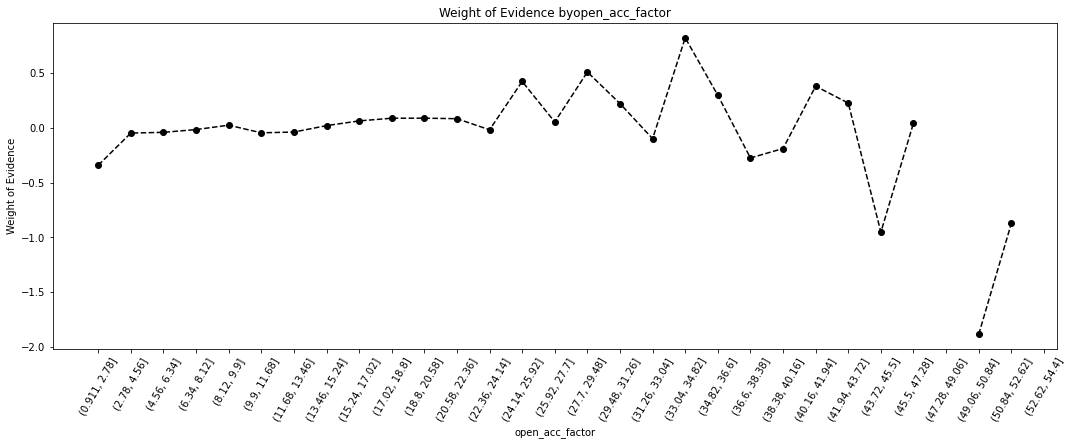

In [162]:
plot_by_woe(df_temp, 60)

In [163]:
df_inputs_prepr['open_acc_factor:0'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(0)), 1, 0)
df_inputs_prepr['open_acc_factor:1-3'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(1,3)), 1, 0)
df_inputs_prepr['open_acc_factor:3-11'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(3,12)), 1, 0)
df_inputs_prepr['open_acc_factor:12-25'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(12,26)), 1, 0)
df_inputs_prepr['open_acc_factor:26-33'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(26,34)), 1, 0)
df_inputs_prepr['open_acc_factor:>34'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(34, int(df_inputs_prepr['open_acc'].max()))), 1, 0)

In [164]:
df_inputs_prepr["pub_rec"].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  6.,  9.,  8., 10., 23.,
       12., 15., 26., 17., 13., 28., 20., 86., 18., 21., 14., 16., 19.,
       49., 22.])

In [165]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "pub_rec", df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,346679,0.981594,0.823282,340298.0,6381.0,0.823482,0.812763,0.013102,NaN,inf
1,1.0,60215,0.979972,0.142997,59009.0,1206.0,0.142795,0.153611,-0.073014,0.086116,inf
2,2.0,9230,0.982124,0.021919,9065.0,165.0,0.021936,0.021016,0.042836,0.115850,inf
3,3.0,2876,0.979833,0.006830,2818.0,58.0,0.006819,0.007388,-0.080055,0.122891,inf
4,4.0,1044,0.977011,0.002479,1020.0,24.0,0.002468,0.003057,-0.213891,0.133836,inf
5,5.0,481,0.979210,0.001142,471.0,10.0,0.001140,0.001274,-0.111122,0.102769,inf
6,6.0,249,0.983936,0.000591,245.0,4.0,0.000593,0.000509,0.151569,0.262691,inf
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000261,0.000000,inf,inf,inf
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000203,0.000000,inf,NaN,inf
9,9.0,34,0.970588,0.000081,33.0,1.0,0.000080,0.000127,-0.466887,inf,inf


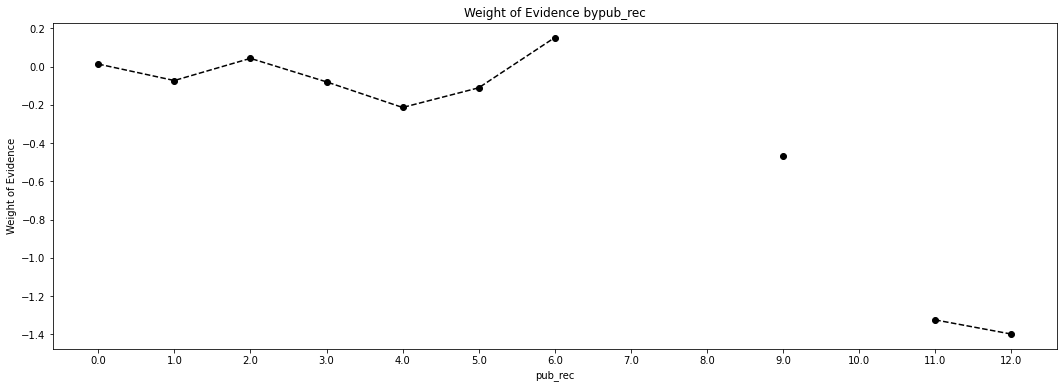

In [166]:
plot_by_woe(df_temp)

In [167]:
#removing all inf values
df_temp = df_temp[df_temp['WoE'] != float('inf')]
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,346679,0.981594,0.823282,340298.0,6381.0,0.823482,0.812763,0.013102,NaN,inf
1,1.0,60215,0.979972,0.142997,59009.0,1206.0,0.142795,0.153611,-0.073014,0.086116,inf
2,2.0,9230,0.982124,0.021919,9065.0,165.0,0.021936,0.021016,0.042836,0.115850,inf
3,3.0,2876,0.979833,0.006830,2818.0,58.0,0.006819,0.007388,-0.080055,0.122891,inf
4,4.0,1044,0.977011,0.002479,1020.0,24.0,0.002468,0.003057,-0.213891,0.133836,inf
5,5.0,481,0.979210,0.001142,471.0,10.0,0.001140,0.001274,-0.111122,0.102769,inf
6,6.0,249,0.983936,0.000591,245.0,4.0,0.000593,0.000509,0.151569,0.262691,inf
9,9.0,34,0.970588,0.000081,33.0,1.0,0.000080,0.000127,-0.466887,inf,inf
11,11.0,15,0.933333,0.000036,14.0,1.0,0.000034,0.000127,-1.324338,inf,inf
12,12.0,14,0.928571,0.000033,13.0,1.0,0.000031,0.000127,-1.398446,0.074108,inf


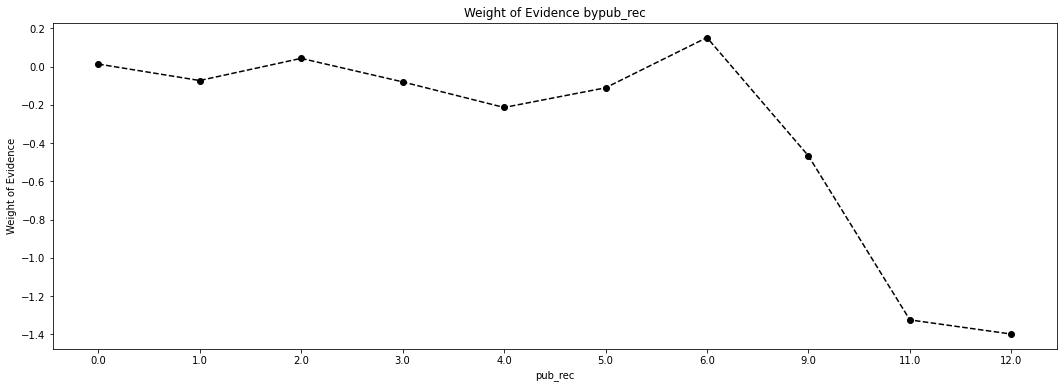

In [168]:
plot_by_woe(df_temp)

In [169]:
df_inputs_prepr['pub_rec:0-2'] = np.where(df_inputs_prepr['pub_rec'].isin(range(0,3)), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where(df_inputs_prepr['pub_rec'].isin(range(3,5)), 1, 0)
df_inputs_prepr['pub_rec:5-7'] = np.where(df_inputs_prepr['pub_rec'].isin(range(5,7)), 1, 0)
df_inputs_prepr['pub_rec:>7'] = np.where(df_inputs_prepr['pub_rec'].isin(range(7,int(df_inputs_prepr['pub_rec'].max()))), 1, 0)

In [170]:
df_inputs_prepr["total_acc"].unique()

array([ 46.,  24.,   6.,  23.,  18.,  31.,  19.,  13.,  47.,  21.,  35.,
        33.,  22.,  17.,  32.,   7.,  14.,   9.,  72.,  20.,  39.,  37.,
        34.,  27.,  26.,   5.,  69.,  15.,  28.,  25.,  29.,  16.,  38.,
        12.,  10.,  63.,  44.,  43.,  48.,  11.,  36.,  42.,  30.,  49.,
        54.,  53.,  52.,  56.,  40.,  41.,  62.,  45.,  68.,  64.,  58.,
        61.,  65.,   8.,  87.,  50.,   4.,  66.,  59.,  60.,  51.,  89.,
        70.,  71.,  57.,  55.,  77.,  75.,  73.,  67.,  76., 105.,  74.,
       102.,  98.,  85.,  81.,  78.,  83.,  79., 111.,  84.,  86.,  94.,
        97.,  90.,  82.,  93., 127.,  96., 101.,  91.,  80., 112., 125.,
       110.,  95.,  88.,  92., 109., 135.,  99., 106., 104., 151., 130.,
       107., 113., 169., 140., 146., 100., 116., 129., 126., 137., 103.,
       124., 138., 162., 114., 108.])

In [171]:
df_inputs_prepr["total_acc_factor"] = pd.cut(df_inputs_prepr["total_acc"], 50)

In [172]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "total_acc_factor", df_targets_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(3.835, 7.3]",11333,0.976970,0.026913,11072.0,261.0,0.026793,0.033244,-0.215741,NaN,inf
1,"(7.3, 10.6]",21005,0.979767,0.049882,20580.0,425.0,0.049801,0.054133,-0.083409,0.132332,inf
2,"(10.6, 13.9]",31446,0.979457,0.074677,30800.0,646.0,0.074532,0.082283,-0.098924,0.015515,inf
3,"(13.9, 17.2]",53180,0.980557,0.126290,52146.0,1034.0,0.126187,0.131703,-0.042782,0.056142,inf
4,"(17.2, 20.5]",44528,0.981742,0.105744,43715.0,813.0,0.105785,0.103554,0.021321,0.064103,inf
5,"(20.5, 23.8]",44749,0.981676,0.106268,43929.0,820.0,0.106303,0.104445,0.017631,0.003690,inf
6,"(23.8, 27.1]",55586,0.981182,0.132004,54540.0,1046.0,0.131980,0.133231,-0.009434,0.027065,inf
7,"(27.1, 30.4]",35493,0.982363,0.084288,34867.0,626.0,0.084374,0.079735,0.056551,0.065985,inf
8,"(30.4, 33.7]",29540,0.982668,0.070151,29028.0,512.0,0.070244,0.065215,0.074297,0.017746,inf
9,"(33.7, 37.0]",30463,0.982405,0.072343,29927.0,536.0,0.072420,0.068272,0.058987,0.015309,inf


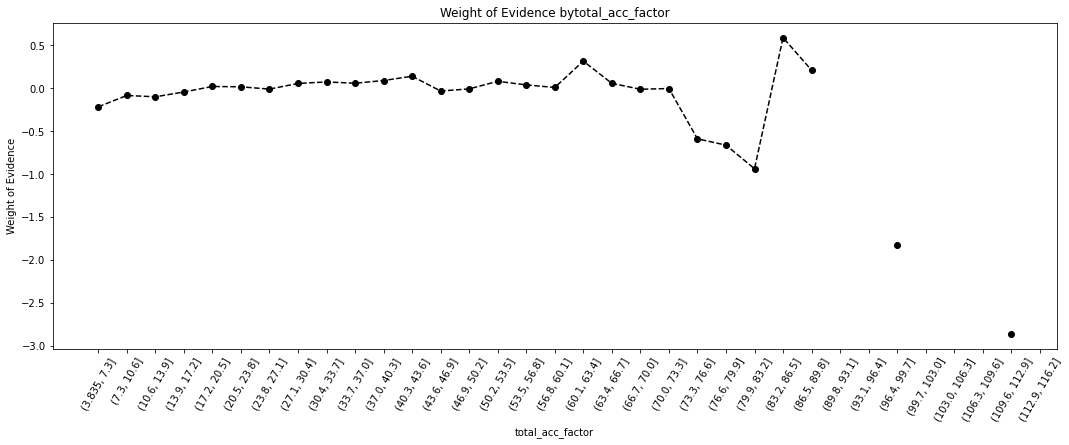

In [173]:
plot_by_woe(df_temp, 60)

In [174]:
df_inputs_prepr['total_acc_factor:<=27'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(0,28)), 1, 0)
df_inputs_prepr['total_acc_factor:28-30'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(18,30)), 1, 0)
df_inputs_prepr['total_acc_factor:30-45'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(30,45)), 1, 0)
df_inputs_prepr['total_acc_factor:45-60'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(45,60)), 1, 0)
df_inputs_prepr['total_acc_factor:60-72'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(60,72)), 1, 0)
df_inputs_prepr['total_acc_factor:>72'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(72, int(df_inputs_prepr['total_acc'].max()))), 1, 0)

In [175]:
df_inputs_prepr["acc_now_delinq"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., 14.])

In [176]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "acc_now_delinq", df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,0.0,418712,0.981424,0.994343,410934.0,7778.0,0.994412,0.990702,0.003738,NaN,inf
1,1.0,2243,0.971021,0.005327,2178.0,65.0,0.005271,0.008279,-0.451620,0.455358,inf
2,2.0,116,0.939655,0.000275,109.0,7.0,0.000264,0.000892,-1.217957,0.766337,inf
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,inf,inf
4,4.0,3,0.666667,0.000007,2.0,1.0,0.000005,0.000127,-3.270248,inf,inf
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,inf,inf
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,inf
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,inf


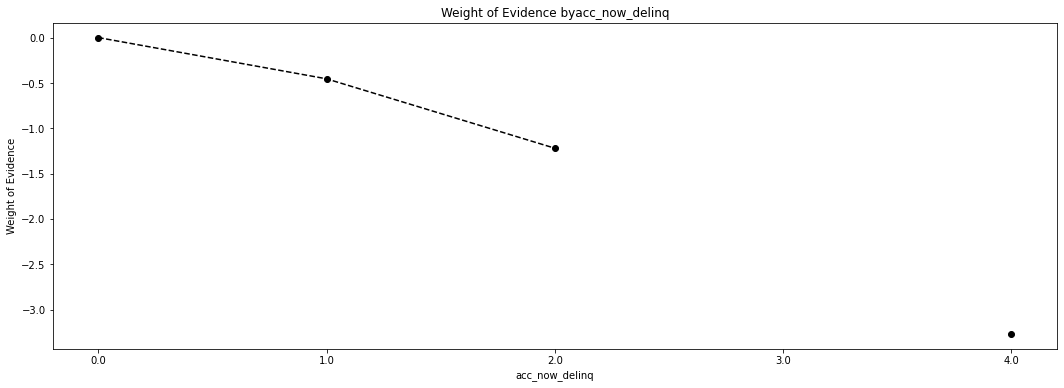

In [177]:
plot_by_woe(df_temp)

In [178]:
df_inputs_prepr["acc_now_delinq:0"] = np.where(df_inputs_prepr["acc_now_delinq"].isin(range(0)), 1, 0)
df_inputs_prepr["acc_now_delinq:1-5"] = np.where(df_inputs_prepr["acc_now_delinq"].isin(range(1, 5)), 1, 0)

In [179]:
df_inputs_prepr["dti"].unique()

array([6.460e+00, 7.280e+00, 1.522e+01, ..., 1.500e-01, 6.000e-02,
       1.000e-02])

In [180]:
df_inputs_prepr["dti_factor"] = pd.cut(df_inputs_prepr["dti"], 50)

In [181]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "dti_factor", df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-9.999, 199.98]",421089,0.981355,0.999988,413238.0,7851.0,0.999988,1.0,-0.000012,NaN,inf
1,"(199.98, 399.96]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,inf,inf
2,"(399.96, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(599.94, 799.92]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,inf
4,"(799.92, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(999.9, 1199.88]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,inf
6,"(1199.88, 1399.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(1399.86, 1599.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(1599.84, 1799.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799.82, 1999.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf


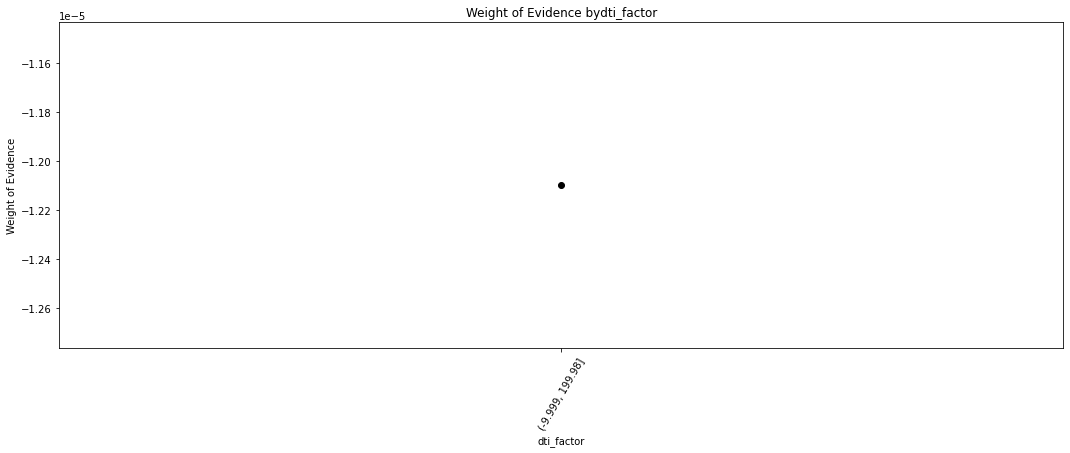

In [182]:
plot_by_woe(df_temp, 60)

In [183]:
df_inputs_prepr['dti:<=1.7'] = np.where(df_inputs_prepr['dti'] <= 1.7, 1, 0)
df_inputs_prepr['dti:1.7-4.1'] = np.where((df_inputs_prepr['dti'] > 1.7) & (df_inputs_prepr['dti'] <= 4.1), 1, 0)
df_inputs_prepr['dti:4.1-8.9'] = np.where((df_inputs_prepr['dti'] > 4.1) & (df_inputs_prepr['dti'] <= 8.9), 1, 0)
df_inputs_prepr['dti:8.9-14.4'] = np.where((df_inputs_prepr['dti'] > 8.9) & (df_inputs_prepr['dti'] <= 14.4), 1, 0)
df_inputs_prepr['dti:14.4-16.8'] = np.where((df_inputs_prepr['dti'] > 14.4) & (df_inputs_prepr['dti'] <= 16.8), 1, 0)
df_inputs_prepr['dti:16.8-24'] = np.where((df_inputs_prepr['dti'] > 16.8) & (df_inputs_prepr['dti'] <= 24.0), 1, 0)
df_inputs_prepr['dti:24-35.9'] = np.where((df_inputs_prepr['dti'] > 24.0) & (df_inputs_prepr['dti'] <= 35.9), 1, 0)
df_inputs_prepr['dti:>35.9'] = np.where(df_inputs_prepr['dti'] > 35.9, 1, 0) 

Notes: 如果需要整数的话那么在np.where的时候需要用变量名_factor，且用range；如果不需要整数的话，直接用变量名就好了

In [184]:
df_inputs_prepr["mths_since_last_record"].unique()

array([ nan,  67.,  30.,   2.,  12.,  66.,  61.,  89.,  71.,  81.,  75.,
        39.,  86., 106.,  50.,  76.,  57.,  74.,  48.,  91.,  22.,  16.,
        58.,  35.,  47.,  69.,  84.,  46., 113.,  54.,  62.,  68.,  55.,
        56.,  42.,   9.,  53.,  64.,  41.,  27.,  73.,  63.,  83.,  70.,
        28.,  37.,  82., 109.,  95.,  65.,  17.,  23.,  77., 111., 117.,
        11.,  79.,  38., 112.,  78.,  26.,   1.,  92.,  36.,  90.,  80.,
        60.,  51.,  85.,  40.,  24.,  87.,  98.,   8., 115.,  45.,  25.,
        44.,  52., 114.,  13.,  88.,  49., 107., 104., 101.,  97.,  33.,
        94.,  93.,  29., 103.,  72.,  59.,  34., 100.,  14.,  15.,  19.,
       105.,  18.,  31.,  21.,  10., 108.,   5., 116., 102.,  99.,  96.,
        43.,   3.,  32.,  20., 119., 118.,   4., 110.,   7.,   0.,   6.,
       120.])

In [185]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr["mths_since_last_record"])]
# Taking only not null values.

In [186]:
df_inputs_prepr_temp["mths_since_last_record_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_record"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/xz/75_5hwqx2yq3hp0g0_nrvshc0000gn/T/ipykernel_64290/1795496528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["mths_since_last_record_factor"] = pd.cut(df_inputs_prepr_temp["mths_since_last_record"], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diffe_Woe,IV
0,"(-0.12, 2.4]",87,0.965517,0.001169,84.0,3.0,0.001152,0.002041,-0.572239,NaN,0.060687
1,"(2.4, 4.8]",161,0.968944,0.002164,156.0,5.0,0.002139,0.003401,-0.464025,0.108214,0.060687
2,"(4.8, 7.2]",344,0.976744,0.004623,336.0,8.0,0.004606,0.005442,-0.166774,0.297252,0.060687
3,"(7.2, 9.6]",291,0.982818,0.003911,286.0,5.0,0.003921,0.003401,0.142111,0.308884,0.060687
4,"(9.6, 12.0]",537,0.970205,0.007216,521.0,16.0,0.007142,0.010884,-0.421282,0.563393,0.060687
5,"(12.0, 14.4]",404,0.985149,0.005429,398.0,6.0,0.005456,0.004082,0.290249,0.711531,0.060687
6,"(14.4, 16.8]",410,0.980488,0.005510,402.0,8.0,0.005511,0.005442,0.012567,0.277682,0.060687
7,"(16.8, 19.2]",693,0.987013,0.009313,684.0,9.0,0.009377,0.006122,0.426290,0.413723,0.060687
8,"(19.2, 21.6]",521,0.986564,0.007001,514.0,7.0,0.007046,0.004762,0.391870,0.034420,0.060687
9,"(21.6, 24.0]",825,0.979394,0.011086,808.0,17.0,0.011077,0.011565,-0.043095,0.434964,0.060687


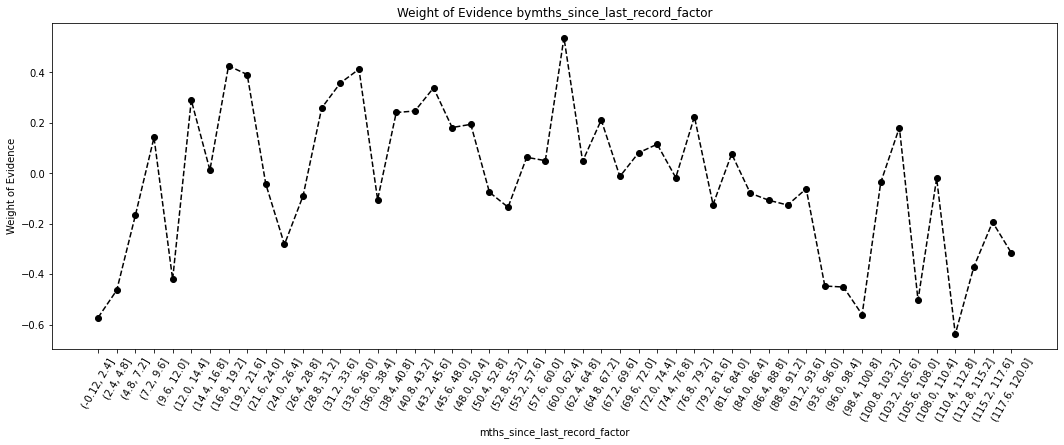

In [187]:
plot_by_woe(df_temp, 60)

In [188]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(0,3)), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(3,21)), 1, 0)
df_inputs_prepr['mths_since_last_record:21-40'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(21,41)), 1, 0)
df_inputs_prepr['mths_since_last_record:41-65'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(41,66)), 1, 0)
df_inputs_prepr['mths_since_last_record:66-84'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(66,85)), 1, 0)
df_inputs_prepr['mths_since_last_record:85-96'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(85,97)), 1, 0)
df_inputs_prepr['mths_since_last_record:>=97'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(97,int(df_inputs_prepr['mths_since_last_record'].max()))), 1, 0)

Preprocessing the test dataset

In [189]:
# loan_data_inputs_train = df_inputs_prepr
# loan_data_inputs_test = df_inputs_prepr
loan_data_inputs_2015 = df_inputs_prepr

In [190]:
loan_data_targets_2015 = df_targets_prepr

In [191]:
# loan_data_inputs_2015.columns.values

In [192]:
loan_data_inputs_2015.shape

(421094, 322)

In [193]:
loan_data_targets_2015.shape

(421094,)

In [194]:
loan_data_inputs_2015.to_csv("loan_data_inputs_2015.csv")
# loan_data_targets_2015.to_csv("loan_data_targets_2015.csv")

TypeError: can only insert Interval objects and NA into an IntervalArray